# Notes for running this notebook
This notebook should be run in a location where "precip" and "wind" directories are located


# Relevant weather data sets for this notebook

1) (Data sets for 1968 - 1971)
[HRM3-gfdl historical climate data](https://www.earthsystemgrid.org/dataset/narccap.hrm3.gfdl-current.table2.html),
[HRM3-hadcm3 historical climate data](https://www.earthsystemgrid.org/dataset/narccap.hrm3.hadcm3-current.table2.html),
[CRCM-ccsm historical climate data](https://www.earthsystemgrid.org/dataset/narccap.crcm.ccsm-current.table2/file.html),
[CRCM-cgcm3 historical climate data](https://www.earthsystemgrid.org/dataset/narccap.crcm.cgcm3-current.table2.html),
[RCM3-cgcm3 historical climate data](https://www.earthsystemgrid.org/dataset/narccap.rcm3.cgcm3-current.table2.html),
[RCM3-gfdl historical climate data](https://www.earthsystemgrid.org/dataset/narccap.rcm3.gfdl-current.table2.html)







2) (Data sets for 2061 - 2066)
[HRM3-gfdl future climate data](https://www.earthsystemgrid.org/dataset/narccap.hrm3.gfdl-future.table2.html),
[HRM3-hadcm3 future climate data](https://www.earthsystemgrid.org/dataset/narccap.hrm3.hadcm3-future.table2.html),
[CRCM-ccsm future climate data](https://www.earthsystemgrid.org/dataset/narccap.crcm.ccsm-future.table2.html),
[CRCM-cgcm3 future climate data](https://www.earthsystemgrid.org/dataset/narccap.crcm.cgcm3-future.table2.html),
[RCM3-cgcm3 future climate data](https://www.earthsystemgrid.org/dataset/narccap.rcm3.cgcm3-future.table2.html),
[RCM3-gfdl future climate data](https://www.earthsystemgrid.org/dataset/narccap.rcm3.gfdl-future.table2.html)




# Part 1: Importing Necessary Modules, Identifying location of interest, and Acquiring/Saving Relevant Weather Files

In [ ]:
# =============================================================================
# Relevant Imports
# =============================================================================
import pandas as pd
import numpy as np
import chrpa.main.processing as main
import os
import glob
import gc
import psutil


climate_models = ['HRM3_gfdl', 'CRCM_ccsm', 'CRCM_cgcm3',
                  'HRM3_hadcm3', 'RCM3_cgcm3', 'RCM3_gfdl']
sites = pd.read_pickle('sites.pkl')

for i in range(len(sites)):

    # Initialization of different pandas.Series for saving data
    time_current = pd.Series(dtype='float64')
    precip_current = pd.Series(dtype='float64')
    time_future = pd.Series(dtype='float64')
    precip_future = pd.Series(dtype='float64')

    site_loc = (sites.iloc[i].lat, sites.iloc[i].lon)
    site_name = 'RandomSite'+str(i)
    print(site_name, site_loc)
    pkl_dir = os.path.join('outputs_multi','pkl_data')

    for mymodel in climate_models:
        myfile = 'pr_'+mymodel+'_1968010103.nc'
        precip_dir = os.path.join('.', 'precip') #directory for precip_files
        ncfilepath = os.path.join(precip_dir, myfile)

        if 'HRM3' in mymodel:
            offset=[0,0]
        else:
            offset = [0,-360]

    #Finding closest grid cell to location of interest for specified weather model
        close_info = main.get_closest_point(site_loc, ncfilepath, offset)

    # =============================================================================
    # Acquiring Weather Files
    # =============================================================================

    #options
        limited_files = False

    # Precipitation
        site_ncindices = (close_info['nc_xindex'], close_info['nc_yindex'])

        ncwvar='pr'
        model_ncfiles = sorted(glob.glob(os.path.join('.', 'precip', 'pr_'+mymodel+'*.nc')))

        if limited_files==True:
            model_ncfiles = model_ncfiles[0:2]+model_ncfiles[-2:] #HACK => just to test code and limit to four precip files

        current_ncfiles = [i for i in model_ncfiles if int(i[-13:-9])<2023]
        future_ncfiles = [i for i in model_ncfiles if int(i[-13:-9])>2023]

        #lists below are of len()=current_/future_ncfiles...one array per file inside the list
        timelistprecip_current, preciplist_current = main.make_ordered_time_weather_lists(current_ncfiles, site_ncindices, ncwvar)
        timelistprecip_future, preciplist_future = main.make_ordered_time_weather_lists(future_ncfiles, site_ncindices, ncwvar)

        time_current[mymodel] = timelistprecip_current
        precip_current[mymodel] = preciplist_current
        time_future[mymodel] = timelistprecip_future
        precip_future[mymodel] = preciplist_future
        psutil.virtual_memory()._asdict()
        gc.collect()
        collected = gc.collect()


    # =============================================================================
    # Saving Relevant Weather Files in pkl format
    # =============================================================================
    time_current.to_pickle(os.path.join(pkl_dir, site_name+'_timelistprecipcurrent_mods.pkl'))
    precip_current.to_pickle(os.path.join(pkl_dir, site_name+'_preciplistcurrent_mods.pkl'))
    time_future.to_pickle(os.path.join(pkl_dir, site_name+'_timelistprecipfuture_mods.pkl'))
    precip_future.to_pickle(os.path.join(pkl_dir, site_name+'_preciplistfuture_mods.pkl'))

RandomSite0 (41.6853205, -94.0407065)


# Resetting Memory

In [5]:
%reset -f

# Part 2:  Processing data

RandomSite0 lat/lon: (41.6853205, -94.0407065)
          model time_period    site_name           min      mean         max  \
0     CRCM_ccsm     current  RandomSite0  0.000000e+00  1.976662   52.607349   
1    CRCM_cgcm3     current  RandomSite0  0.000000e+00  2.275268   64.020132   
2     HRM3_gfdl     current  RandomSite0  0.000000e+00  2.382353  191.131092   
3   HRM3_hadcm3     current  RandomSite0 -1.678208e-08  2.514934  175.051889   
4    RCM3_cgcm3     current  RandomSite0 -1.636031e-17  2.757726  129.835001   
5     RCM3_gfdl     current  RandomSite0 -2.749548e-17  2.831840  105.822055   
6     CRCM_ccsm      future  RandomSite0  0.000000e+00  2.032562   98.955528   
7    CRCM_cgcm3      future  RandomSite0  0.000000e+00  2.375560   83.989233   
8     HRM3_gfdl      future  RandomSite0  0.000000e+00  2.546393  102.317063   
9   HRM3_hadcm3      future  RandomSite0 -1.491083e-08  2.712604  165.357721   
10   RCM3_cgcm3      future  RandomSite0 -1.802790e-17  2.934601  177.689

P:\hmendo\Documents\NSRD\github\chrpa_temp\chrpa\chrpa\main\processing.py:747: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=myfigsize)


RandomSite5 lat/lon: (38.86362731, -94.55500649)
          model time_period    site_name           min      mean         max  \
0     CRCM_ccsm     current  RandomSite5  0.000000e+00  2.024769   65.501002   
1    CRCM_cgcm3     current  RandomSite5  0.000000e+00  2.379028   73.197119   
2     HRM3_gfdl     current  RandomSite5  0.000000e+00  3.129493  104.667475   
3   HRM3_hadcm3     current  RandomSite5 -3.093065e-08  2.970905  217.651458   
4    RCM3_cgcm3     current  RandomSite5 -1.852620e-17  2.683327  156.530051   
5     RCM3_gfdl     current  RandomSite5 -1.919324e-17  2.850429  146.681188   
6     CRCM_ccsm      future  RandomSite5  0.000000e+00  2.080406   64.296352   
7    CRCM_cgcm3      future  RandomSite5  0.000000e+00  2.552616   81.024951   
8     HRM3_gfdl      future  RandomSite5  0.000000e+00  3.101090  146.466799   
9   HRM3_hadcm3      future  RandomSite5 -1.168274e-08  3.090054  211.987077   
10   RCM3_cgcm3      future  RandomSite5 -2.254431e-17  2.751541  161.8

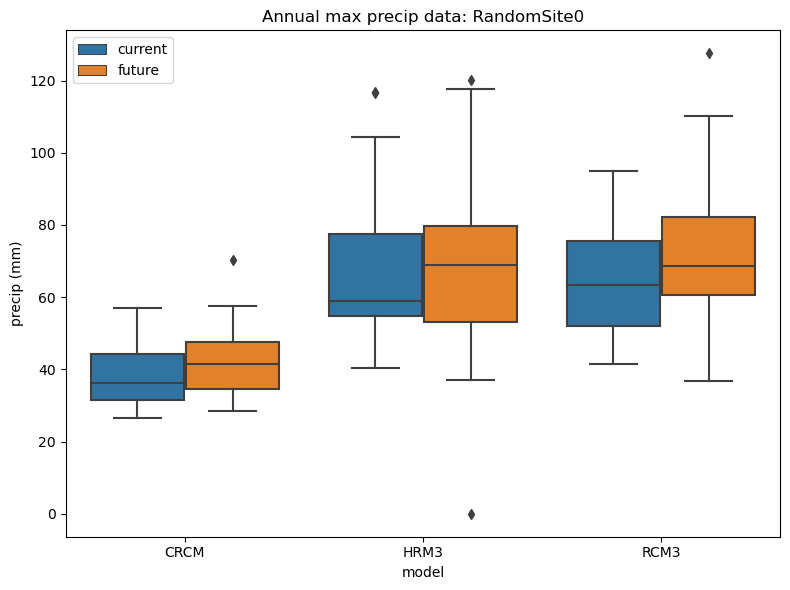

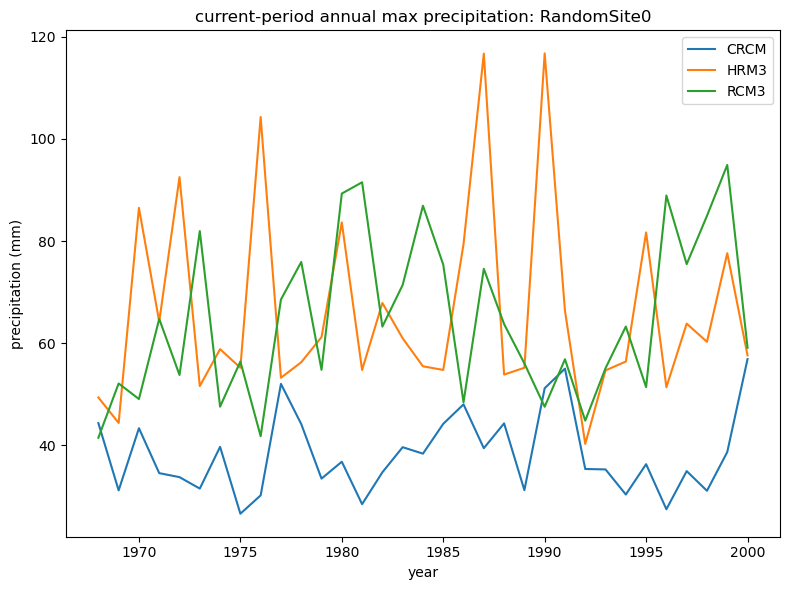

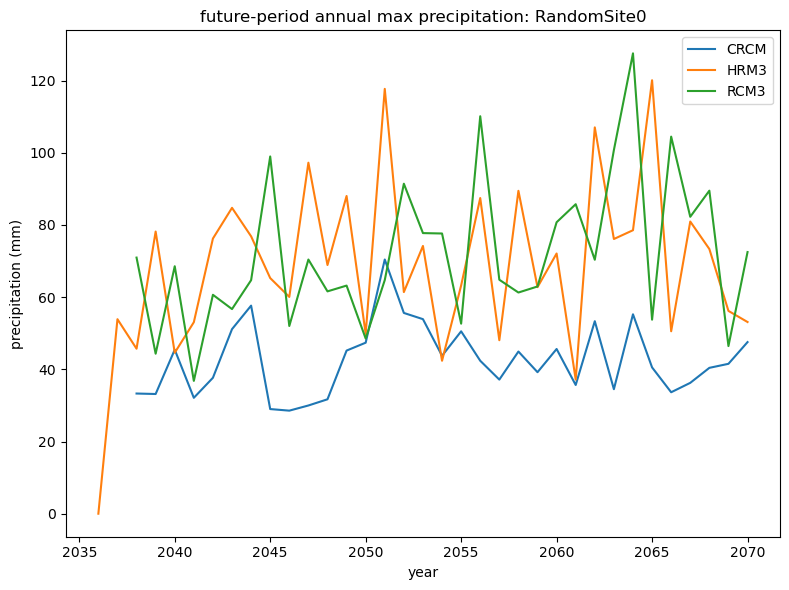

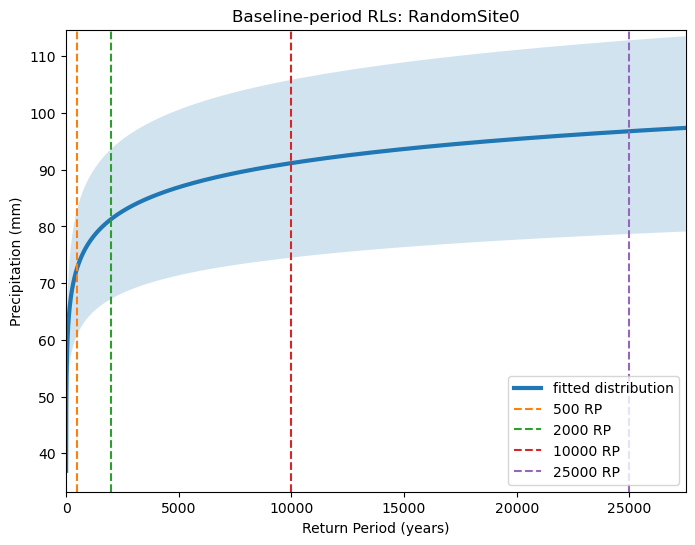

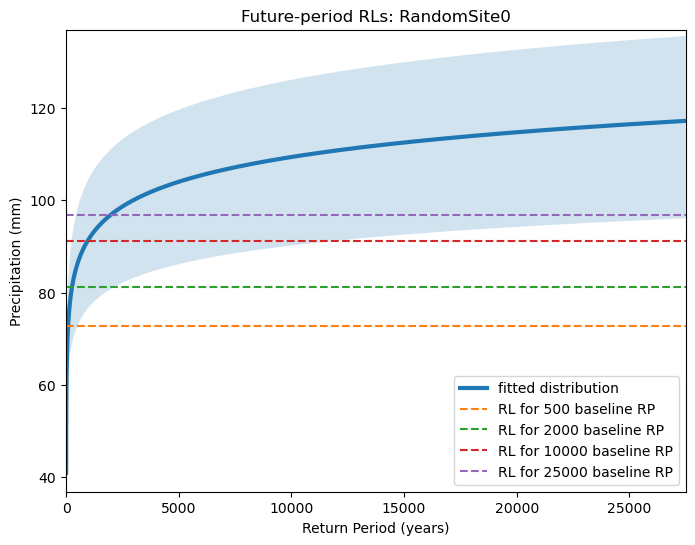

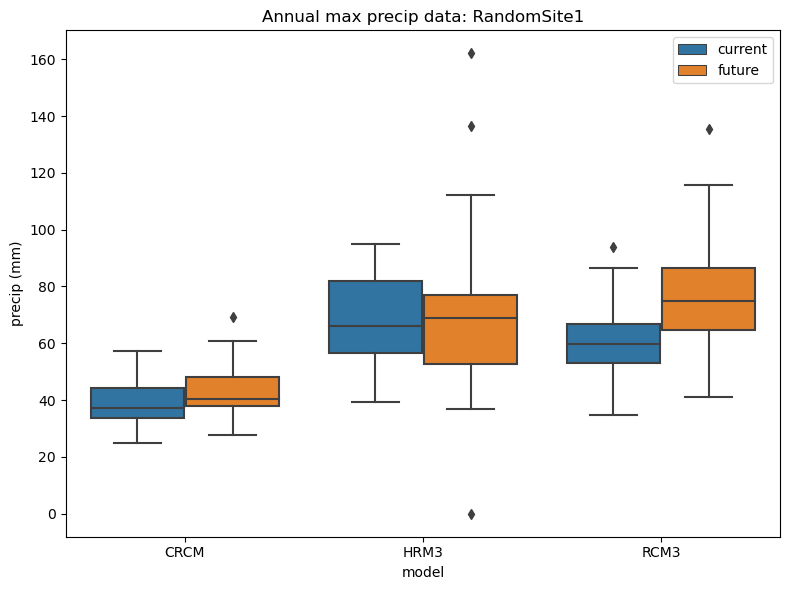

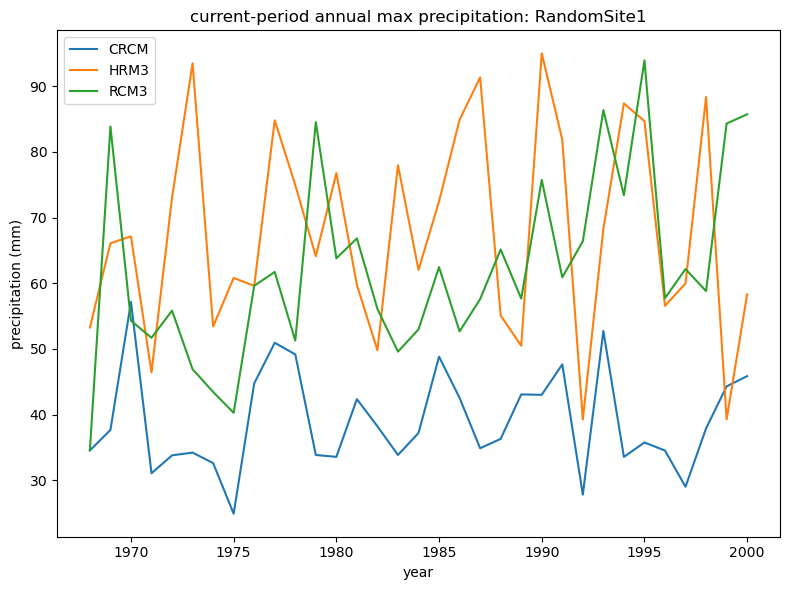

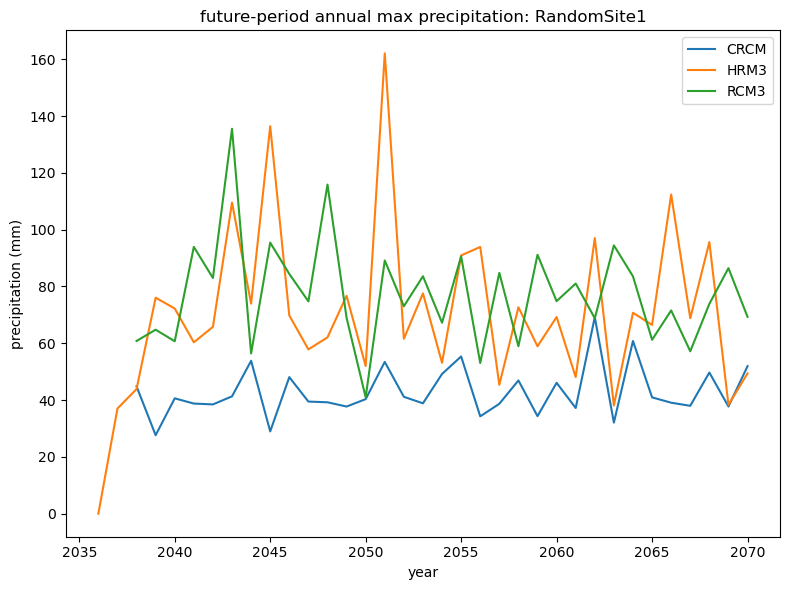

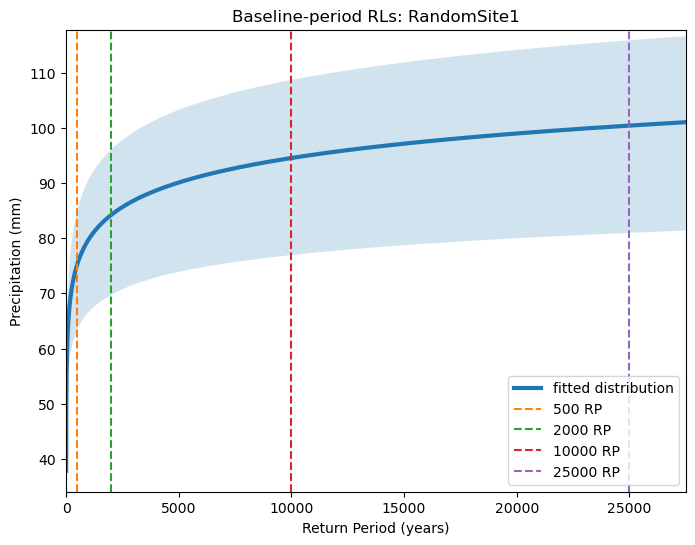

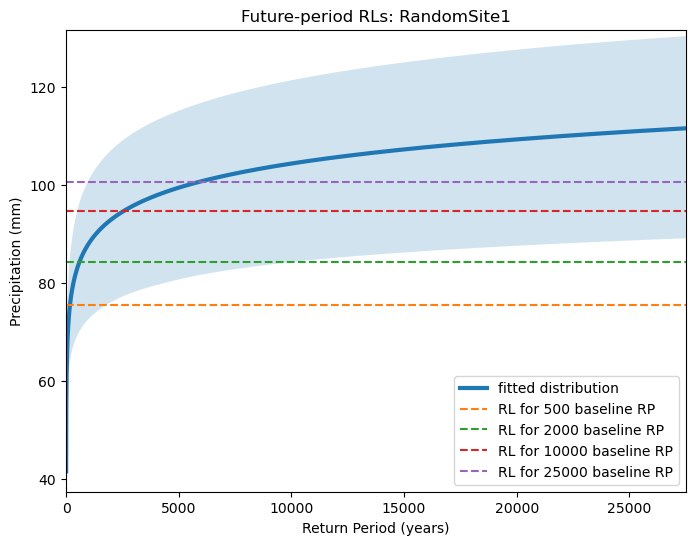

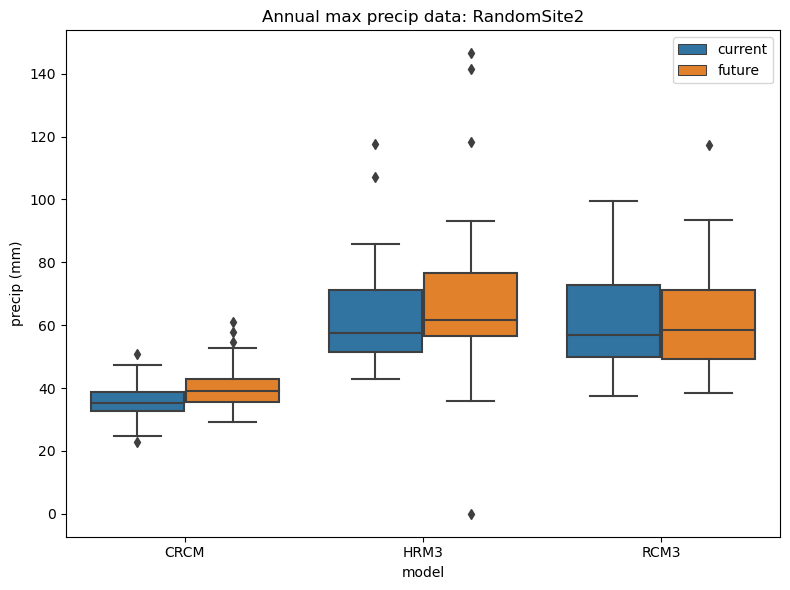

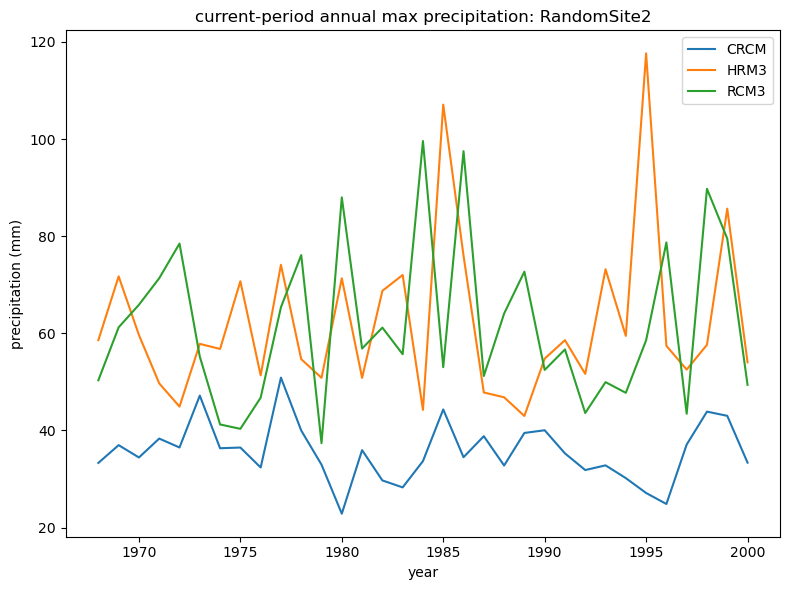

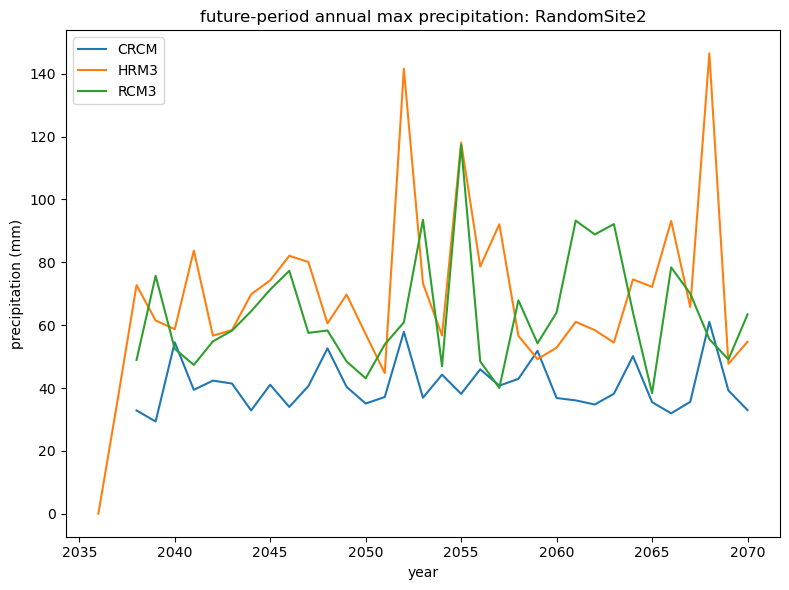

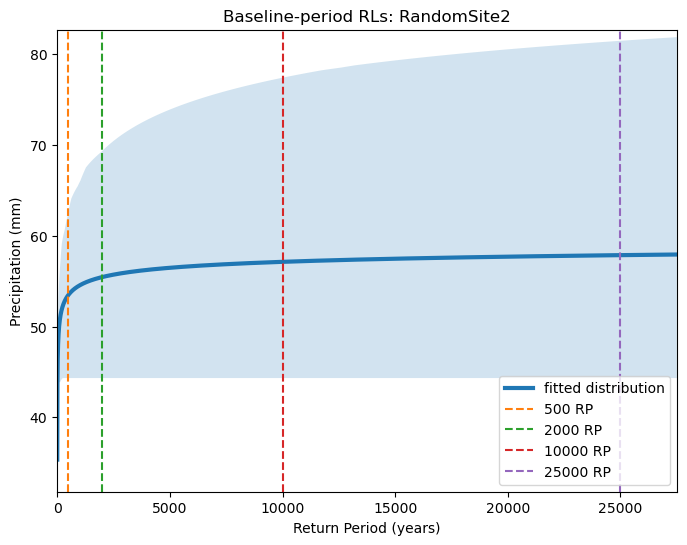

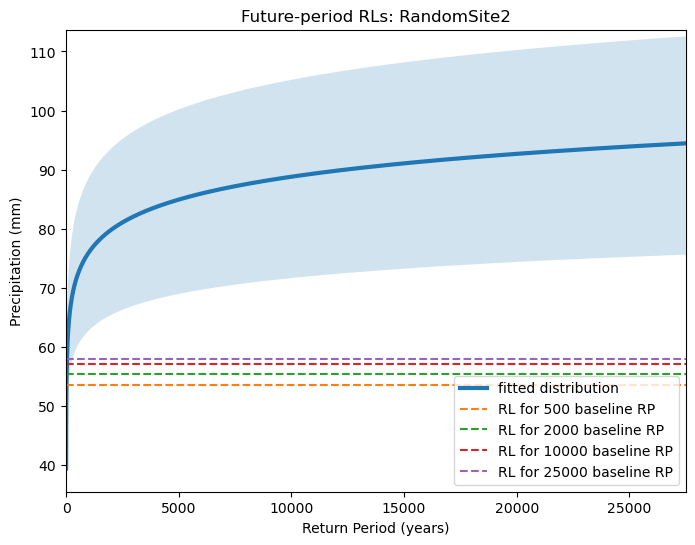

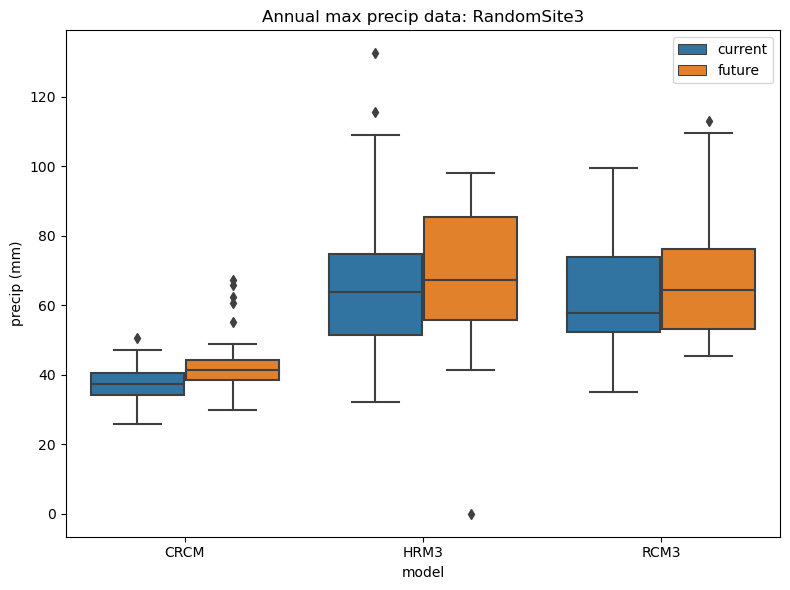

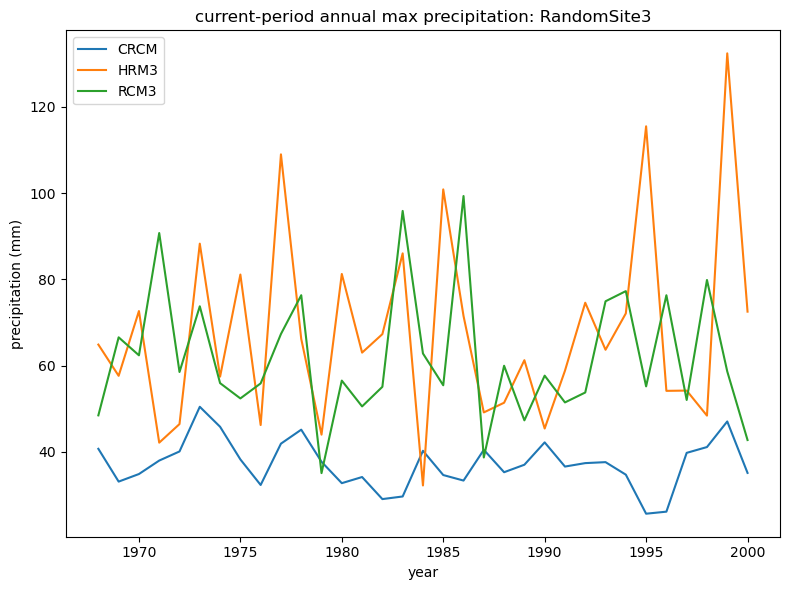

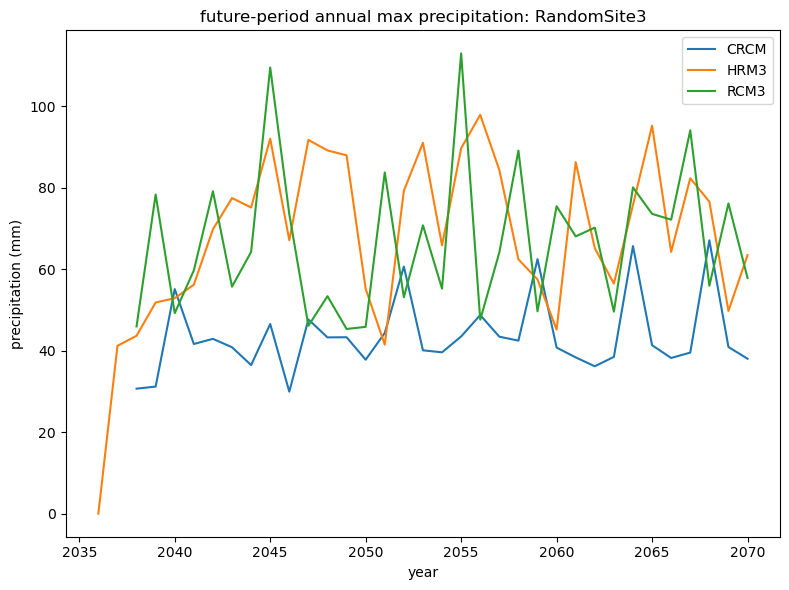

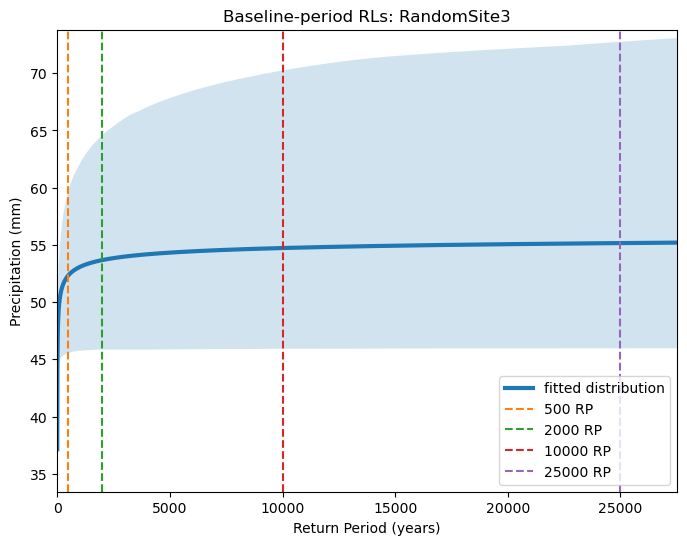

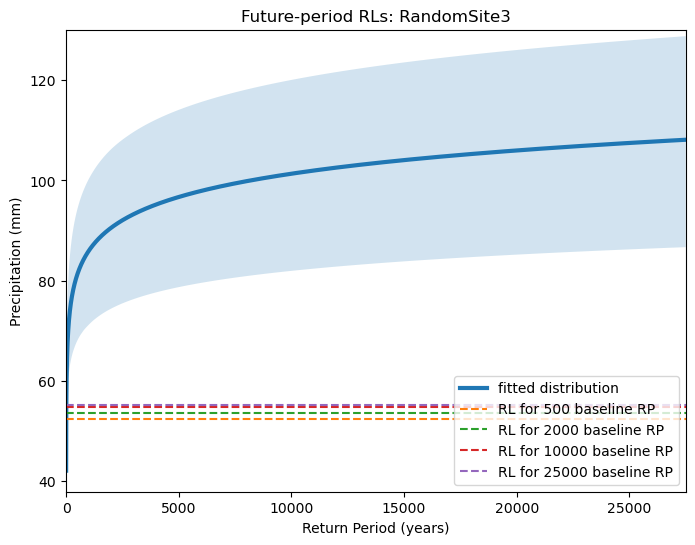

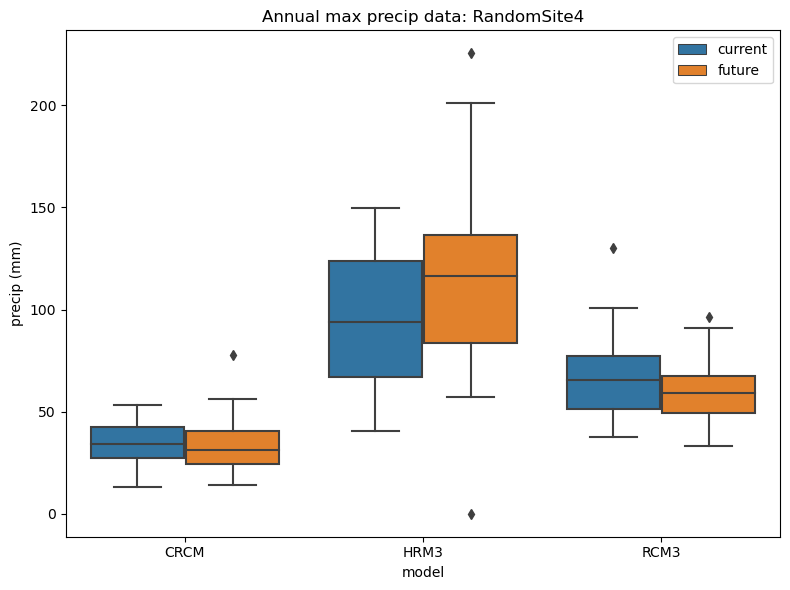

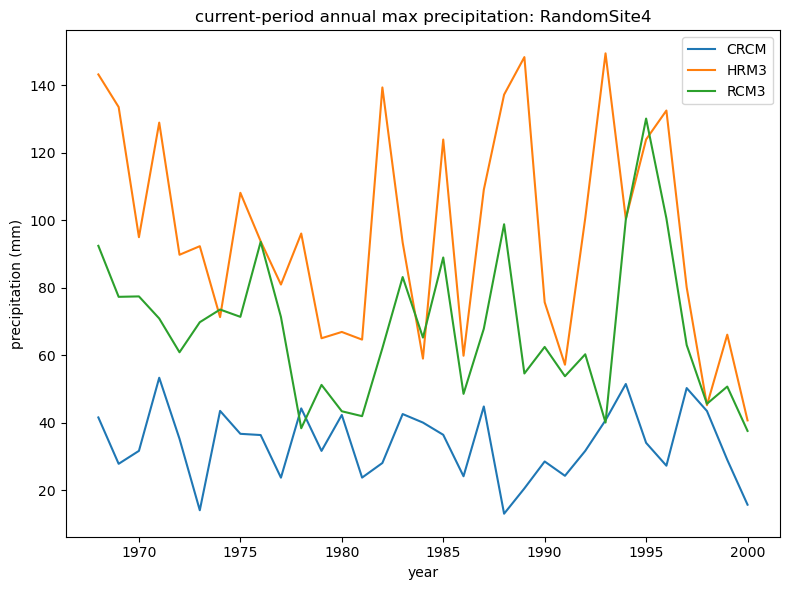

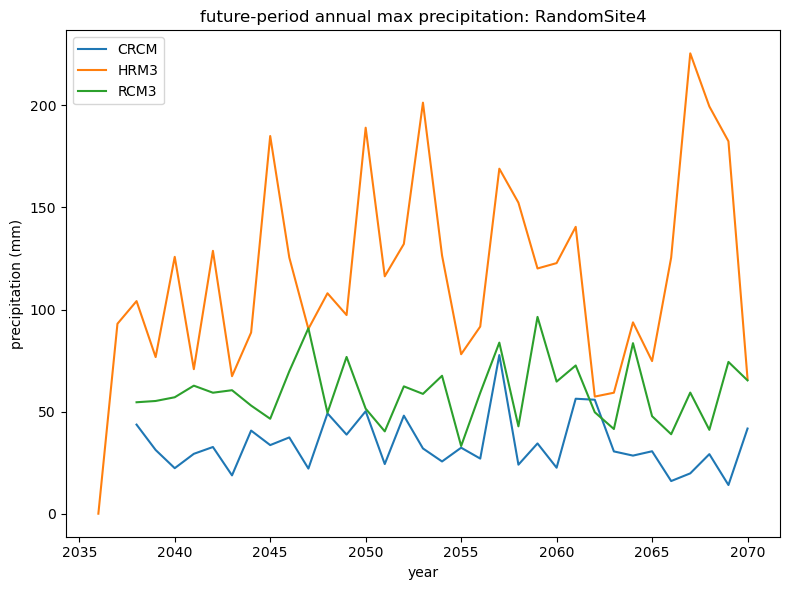

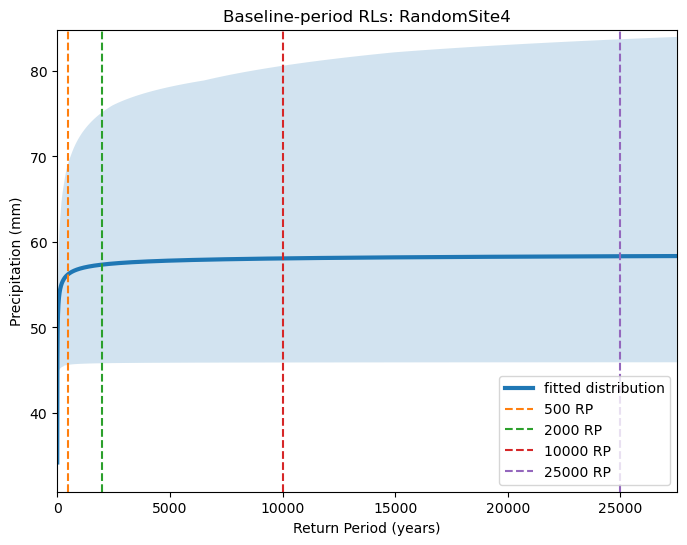

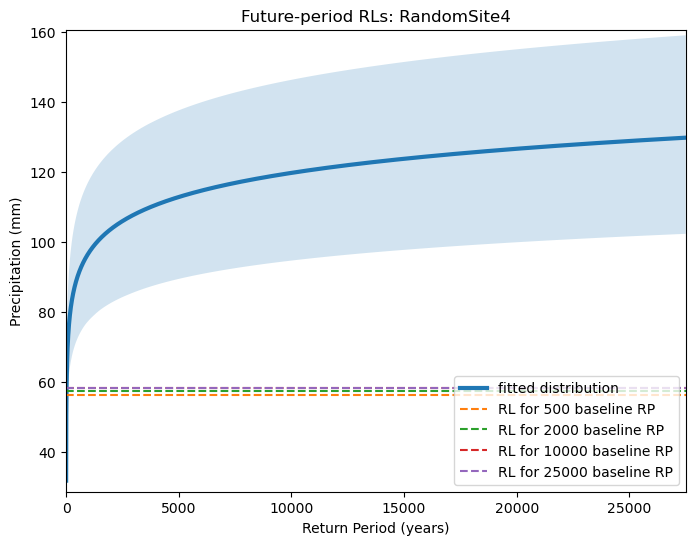

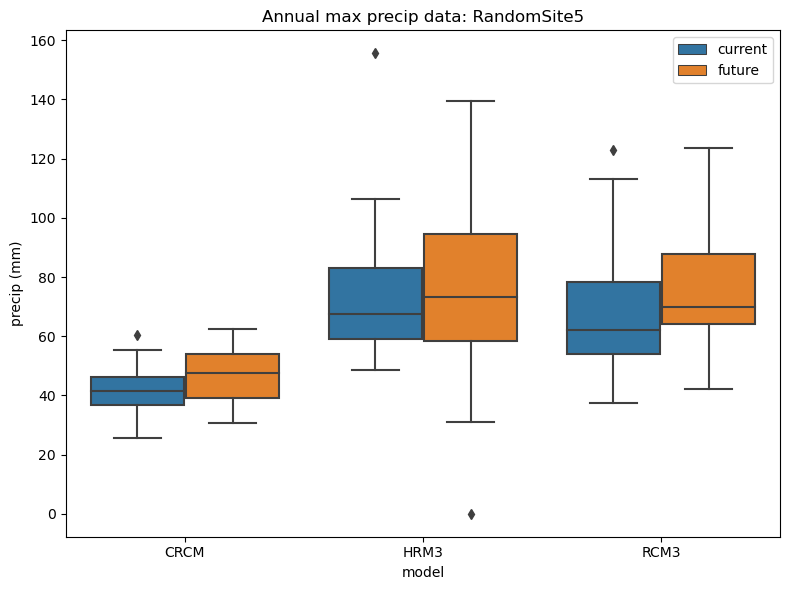

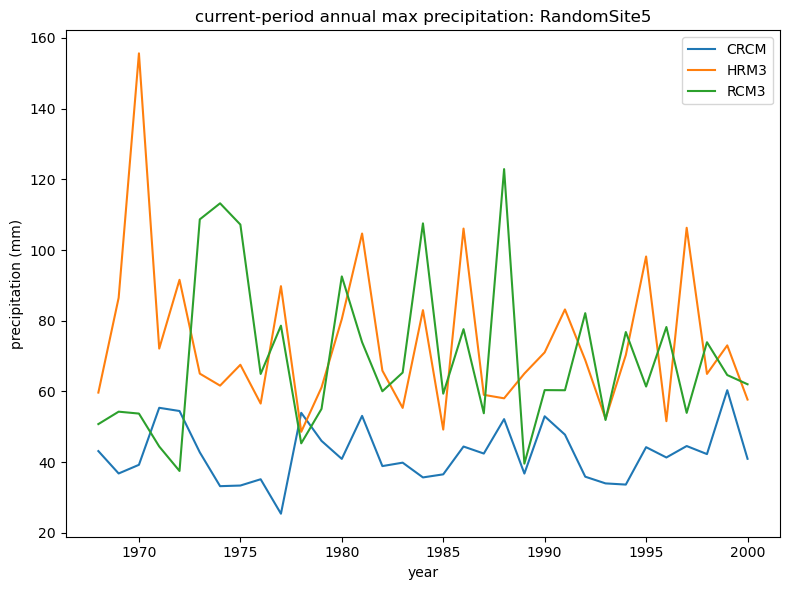

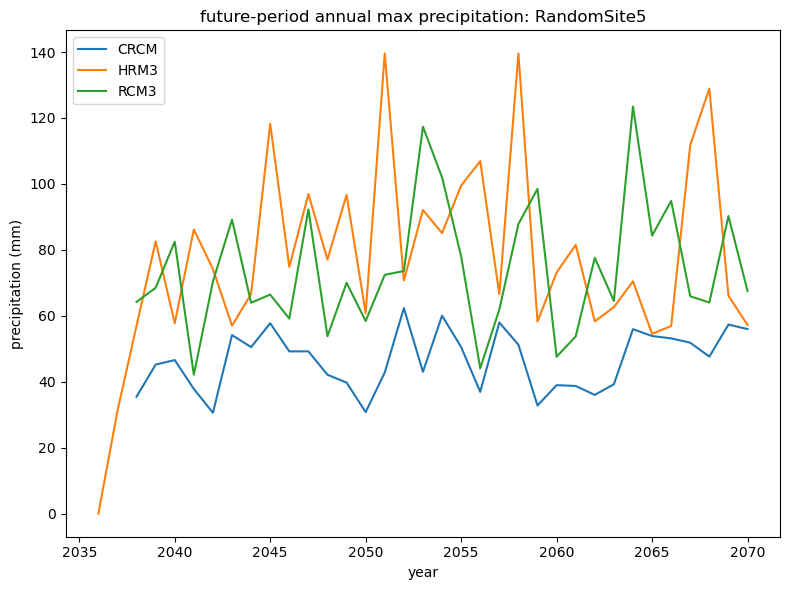

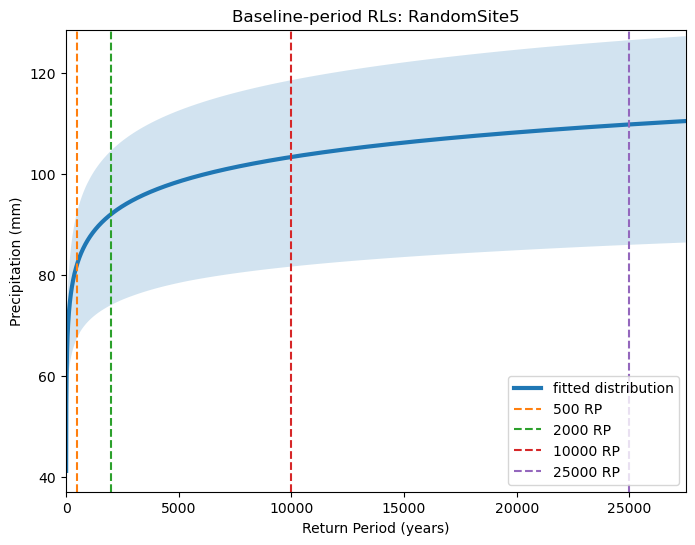

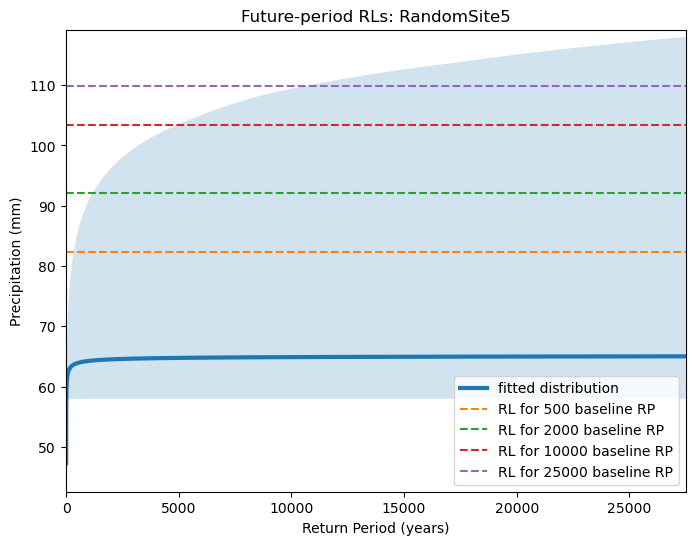

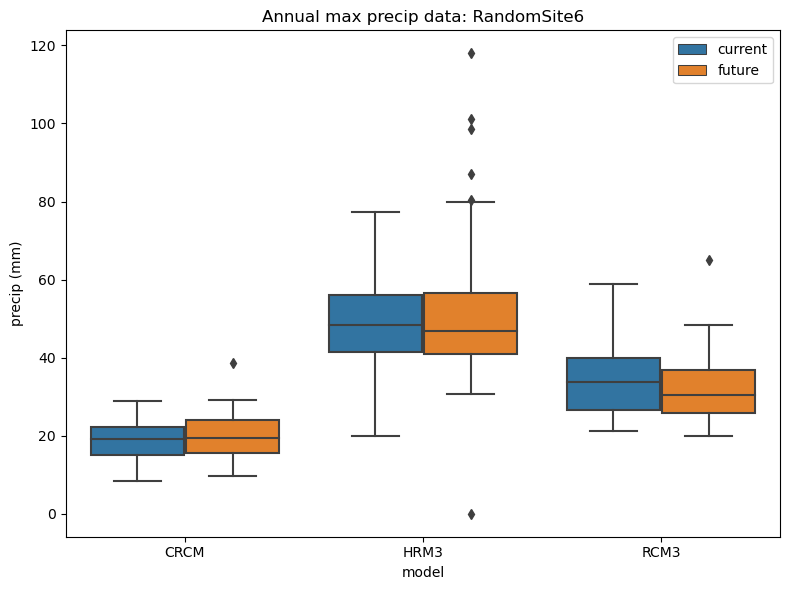

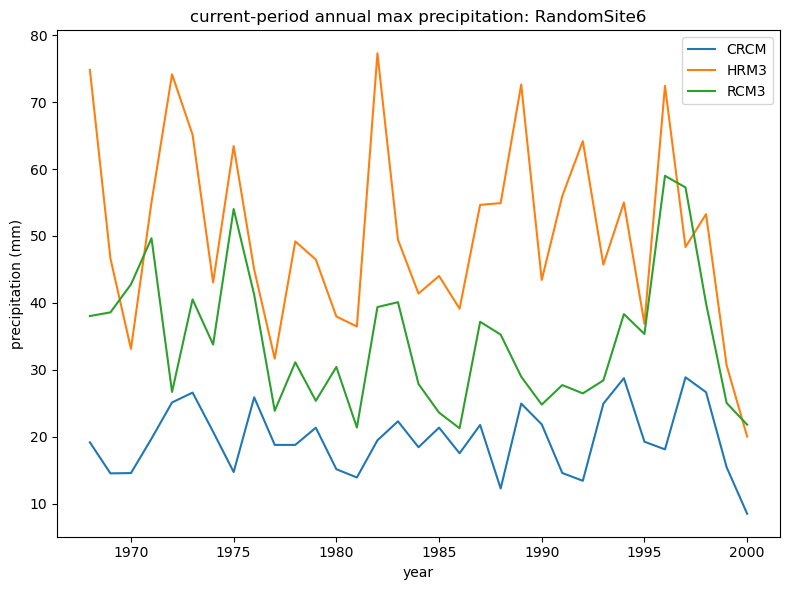

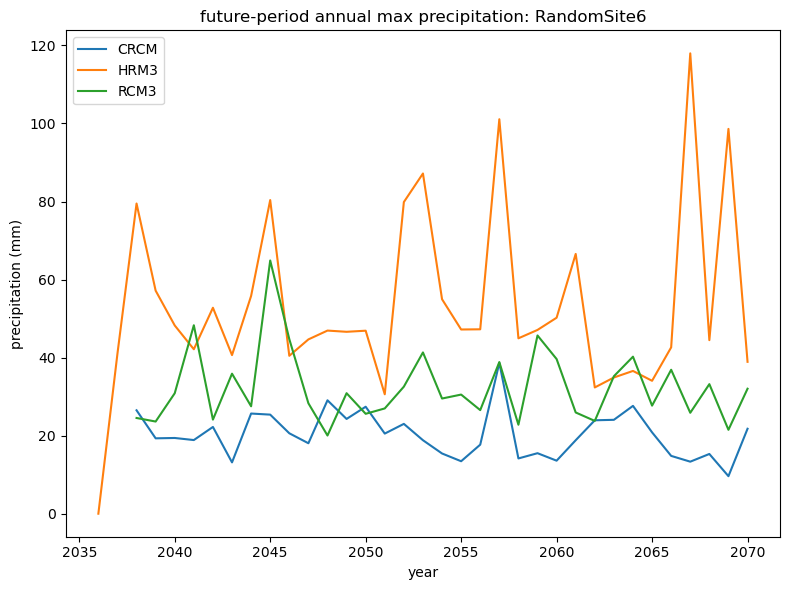

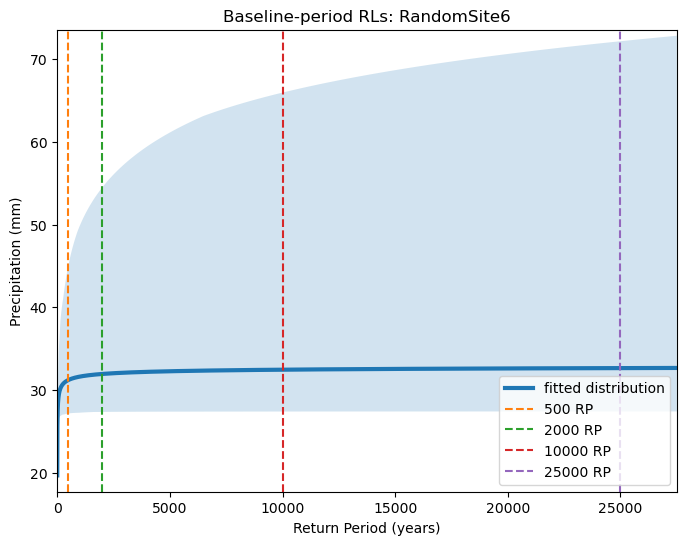

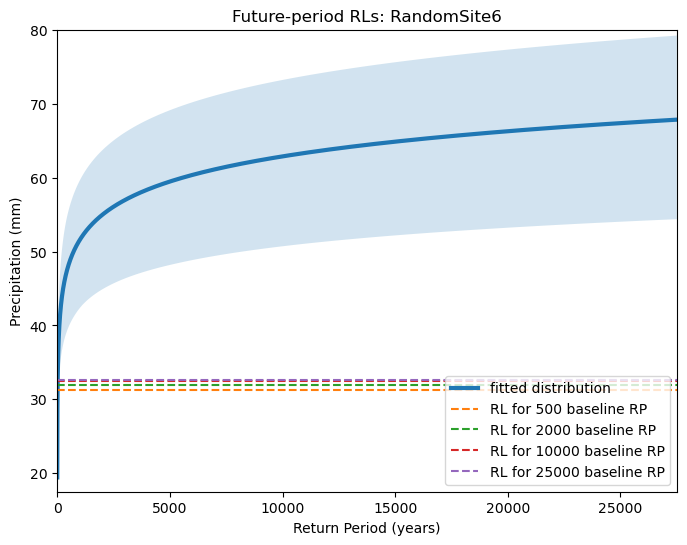

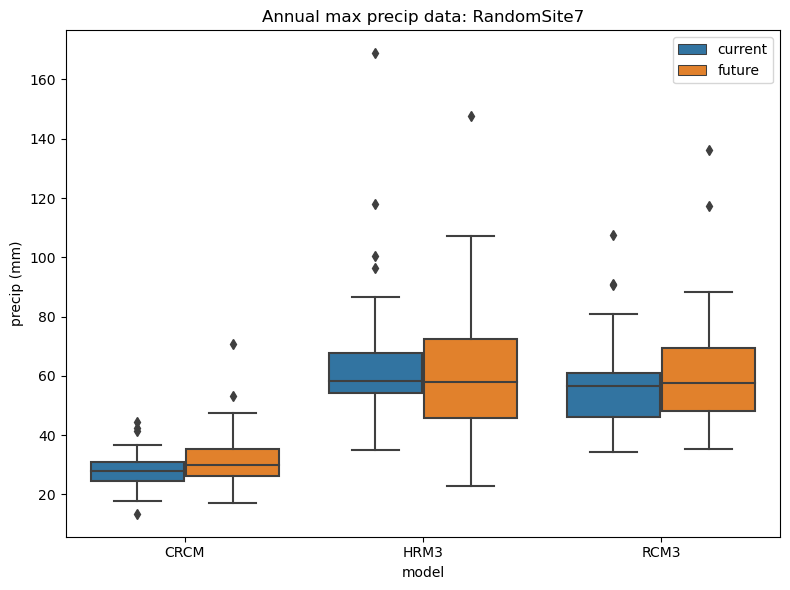

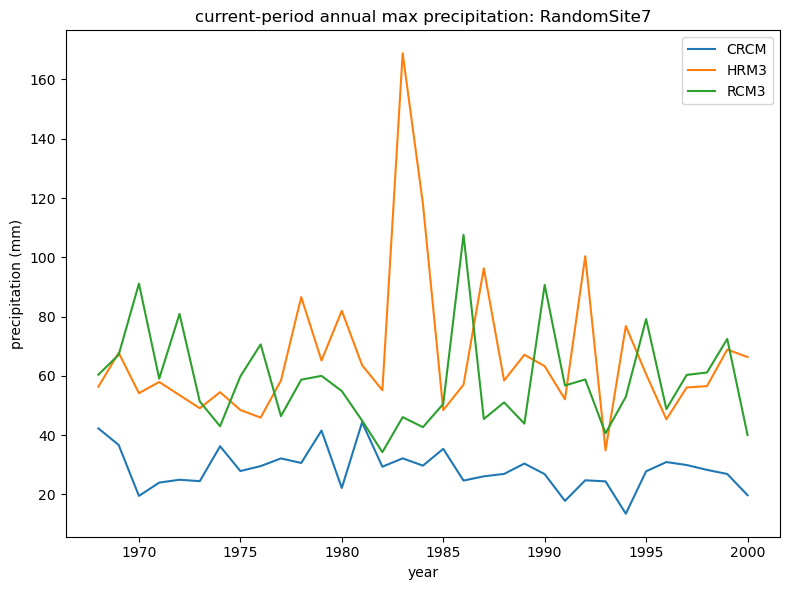

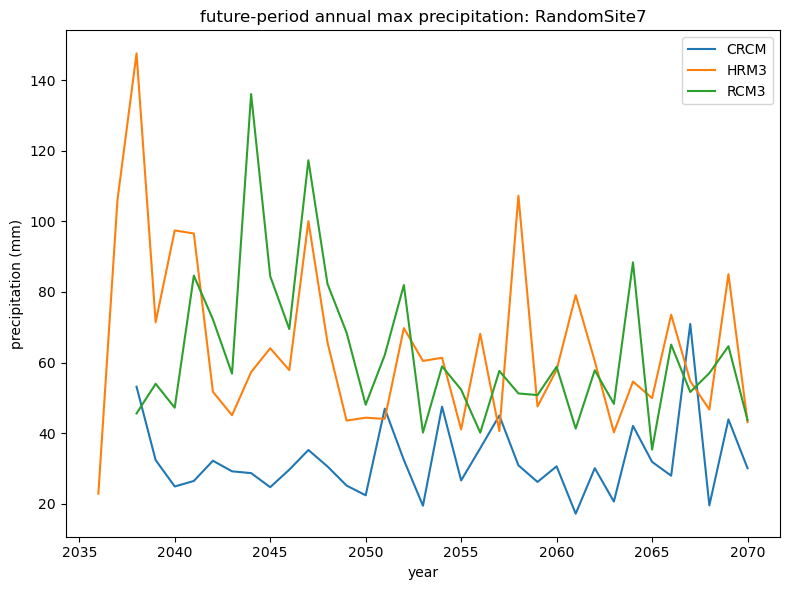

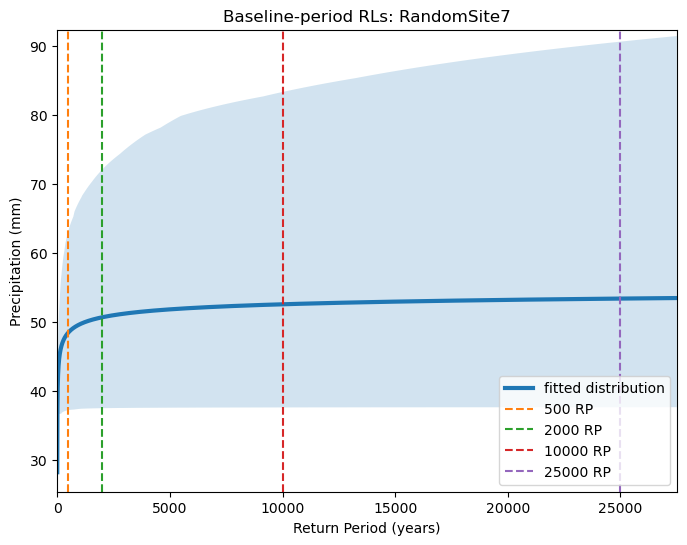

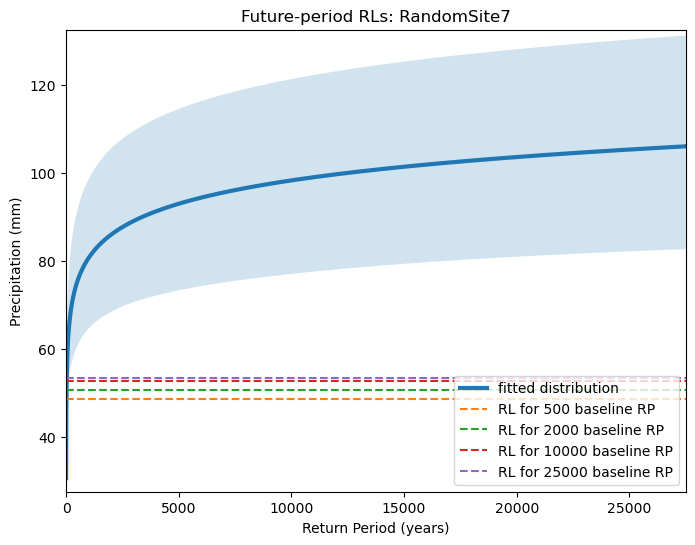

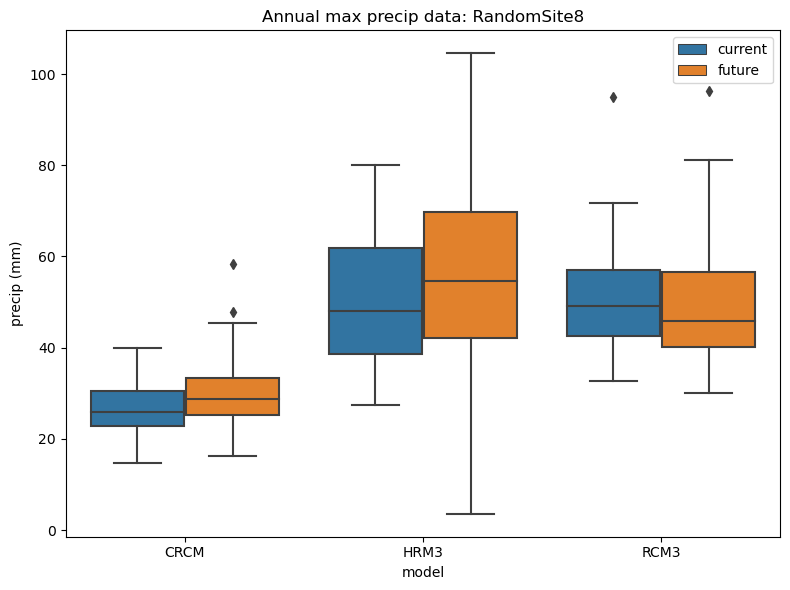

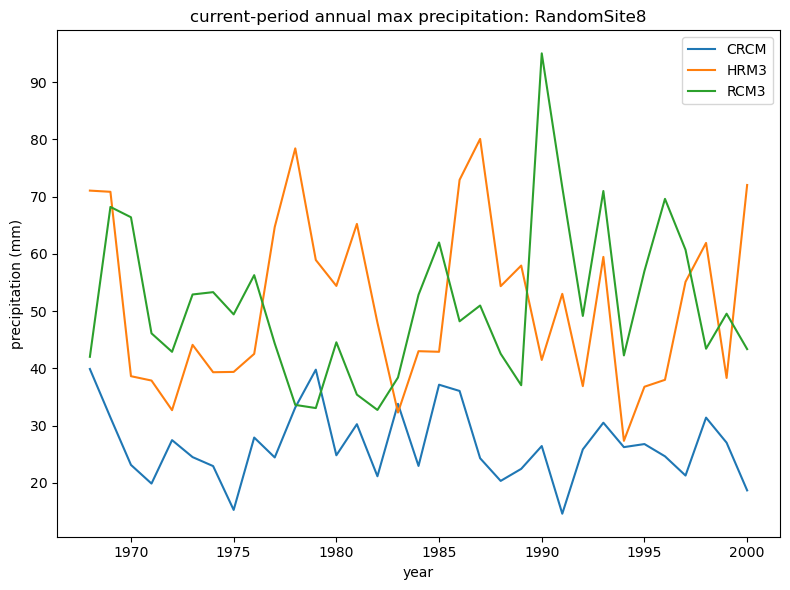

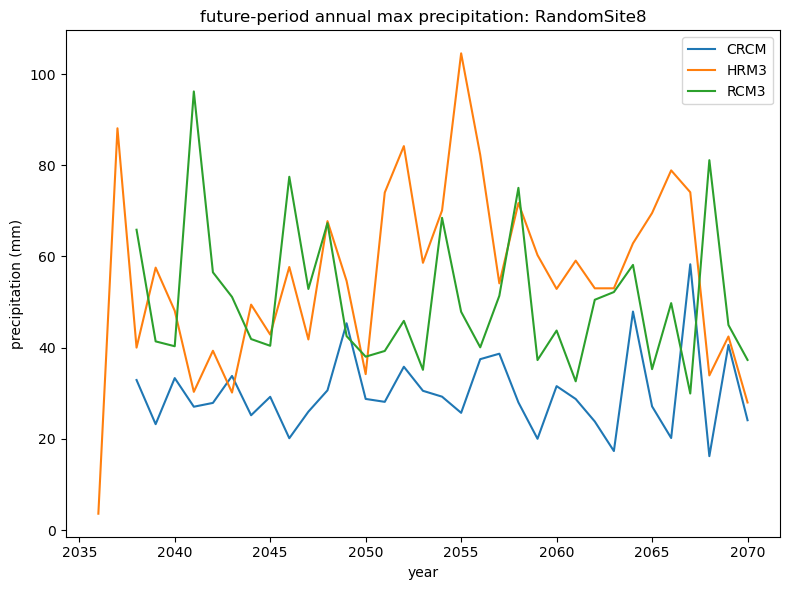

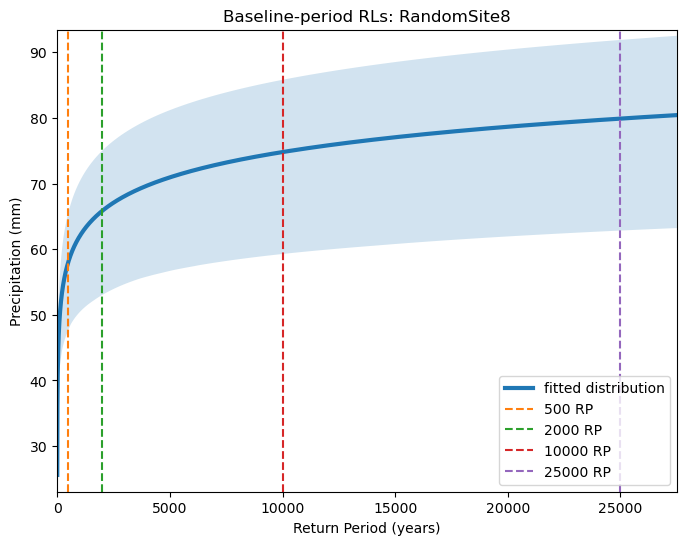

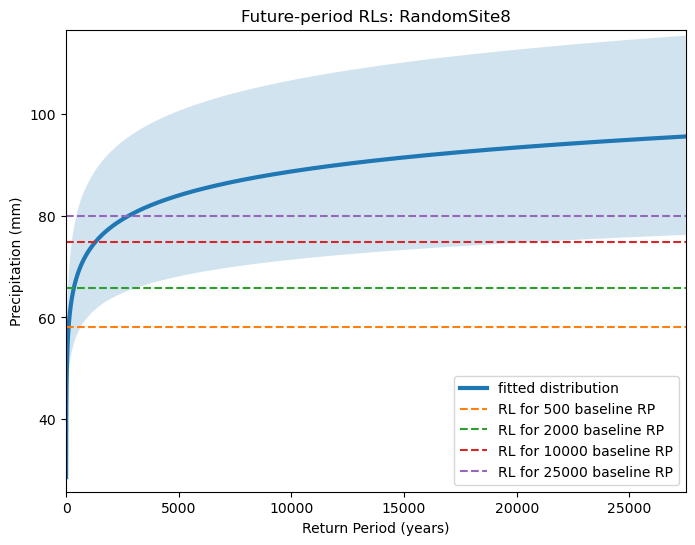

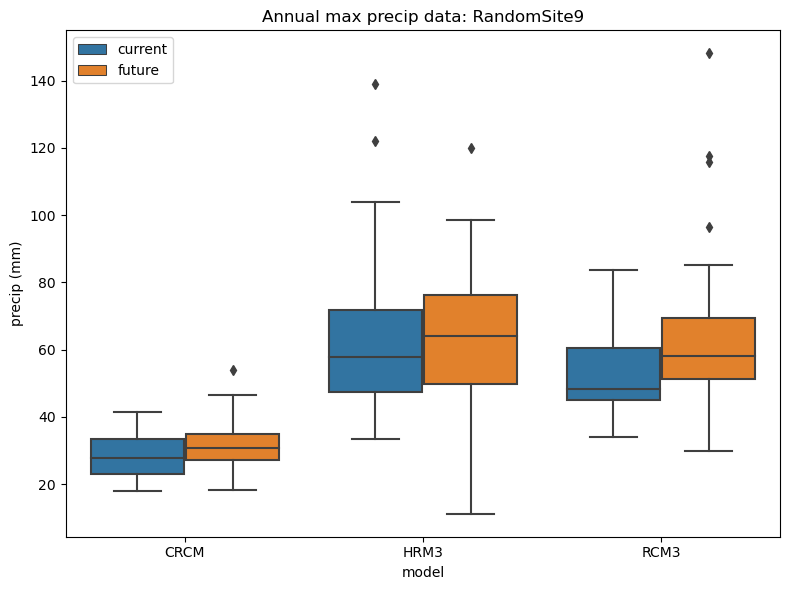

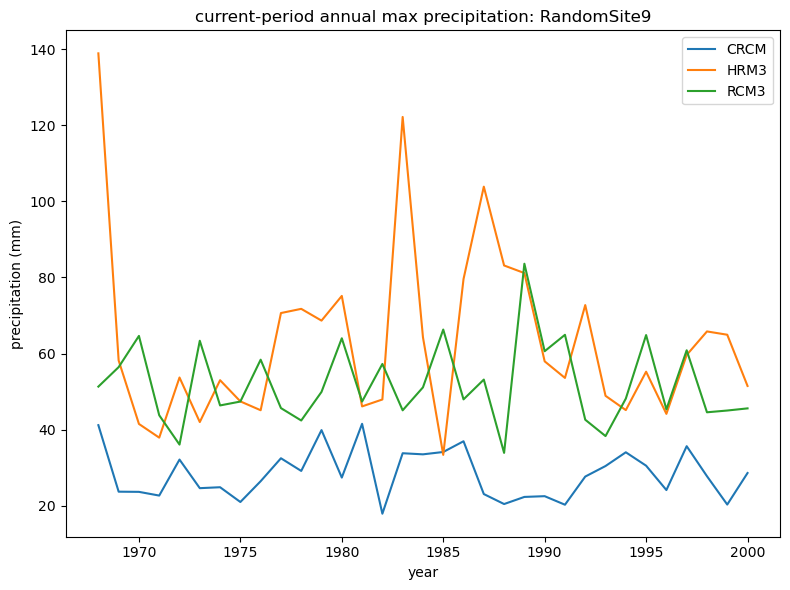

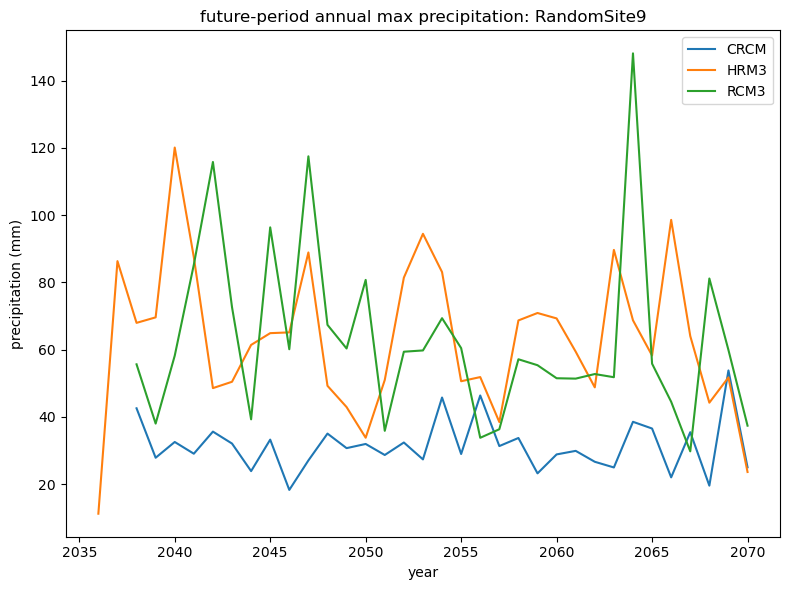

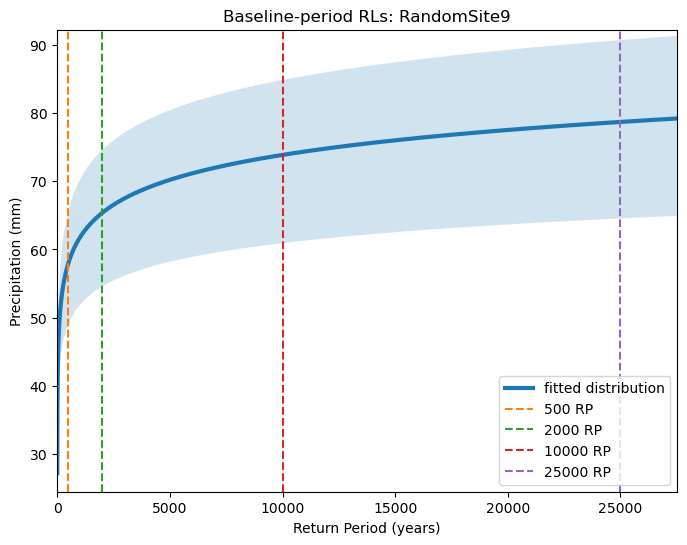

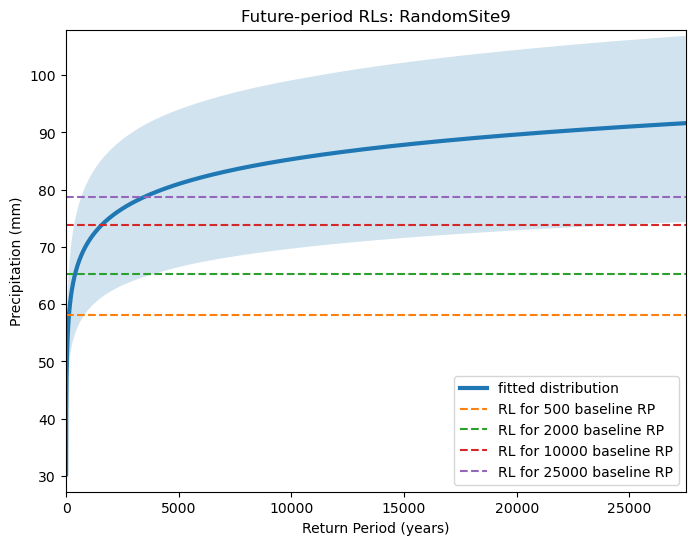

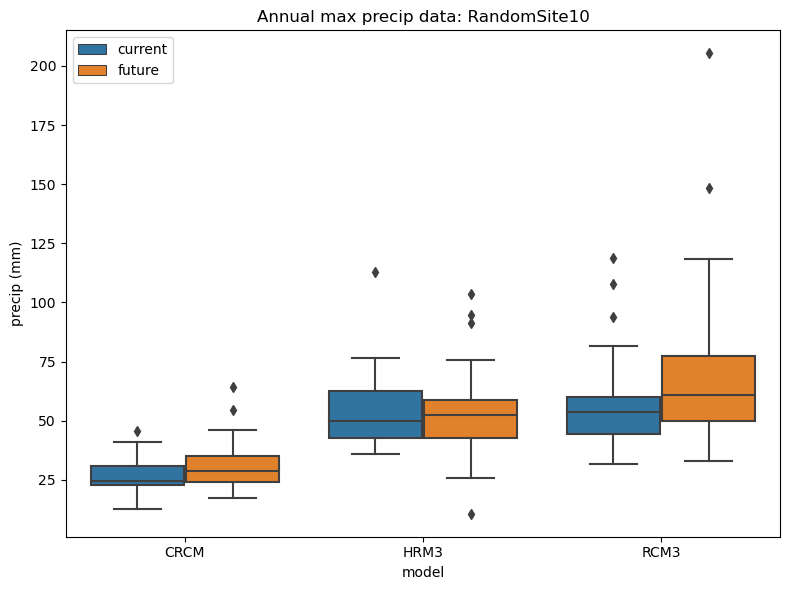

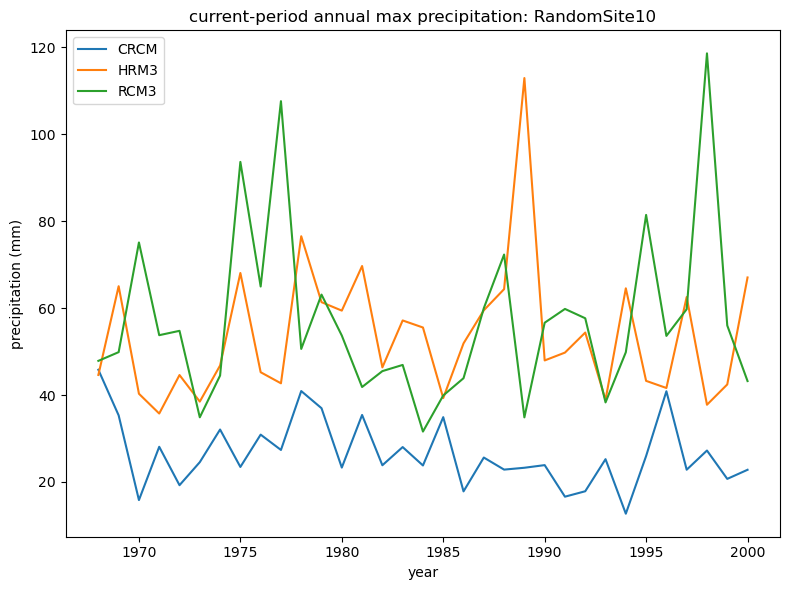

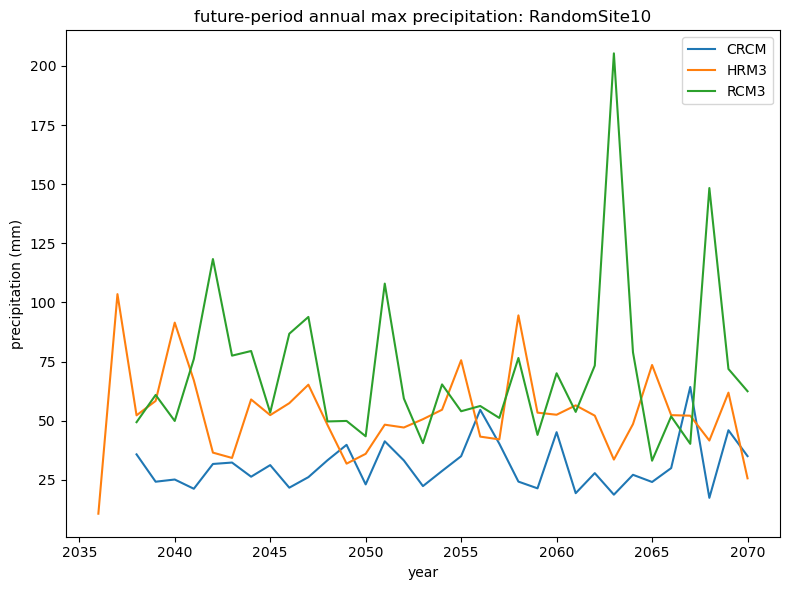

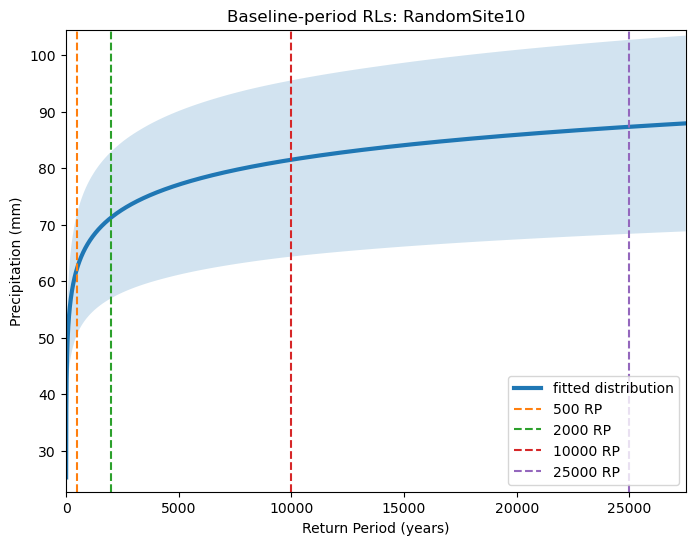

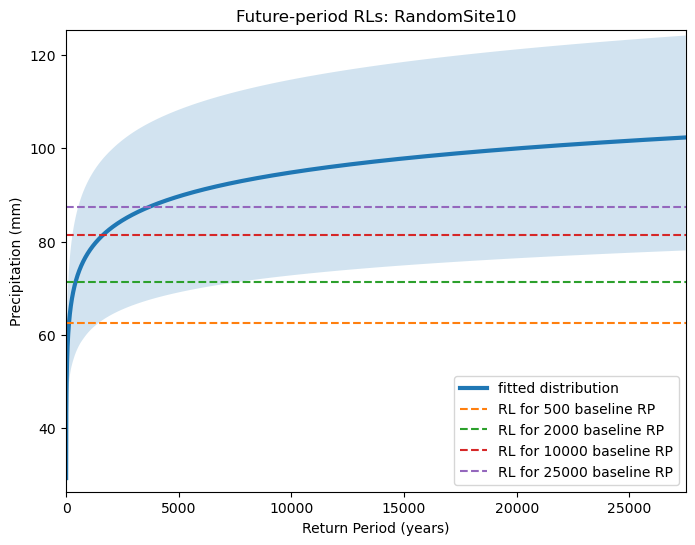

In [1]:
# =============================================================================
# #Relevant Imports
# =============================================================================
import pandas as pd
import numpy as np
import chrpa.main.processing as main
import os
import glob

# =============================================================================
# Loading lists from Part 1 above
# =============================================================================
climate_models = ['HRM3_gfdl', 'CRCM_ccsm', 'CRCM_cgcm3',
                  'HRM3_hadcm3', 'RCM3_cgcm3', 'RCM3_gfdl']

pkl_dir = os.path.join('outputs_multi','pkl_data')
genplots_dir = os.path.join('outputs_multi', 'plots', 'precip') #general plots directory

sites = pd.read_pickle('sites.pkl')
precip_stats_allsites = pd.DataFrame()
RPsRLsDF = pd.DataFrame()

for i in range(len(sites)):
    site_loc = (sites.iloc[i].lat, sites.iloc[i].lon)
    site_name = 'RandomSite'+str(i)
    print(site_name+' lat/lon:', site_loc)

    time_current_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_timelistprecipcurrent_mods.pkl'))
    precip_current_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_preciplistcurrent_mods.pkl'))
    time_future_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_timelistprecipfuture_mods.pkl'))
    precip_future_ser = pd.read_pickle(os.path.join(pkl_dir, site_name+'_preciplistfuture_mods.pkl'))

    precip_stats_main = pd.DataFrame()
    precipDF_AnnMax = pd.DataFrame()
    for mymodel in climate_models:
        # =============================================================================
        # Creating Time-Weather Data Frames
        # =============================================================================
        timelistprecip_current = time_current_ser[mymodel]
        preciplist_current = precip_current_ser[mymodel]
        timelistprecip_future = time_future_ser[mymodel]
        preciplist_future = precip_future_ser[mymodel]


        # =============================================================================
        #     Precipitation
        # =============================================================================
        start_time1 = "1968-01-01 00:00:00"
        start_time2 = "2038-01-01 00:00:00" #used for converting all "future" time-deltas (as provided by the NARCCAP files), except for HRM3-based climate models which use start_time1

        wvar='precip'
        tint = 3 #hours
        tvar = 'time'

        timeprecipDF_current = main.timedelta_to_continuous_w_weather(timelistprecip_current,
                                                                  preciplist_current,
                                                                  wvar=wvar,
                                                                  start_time=start_time1,
                                                                  start_time_format="%Y-%m-%d %H:%M:%S",
                                                                  td_unit='days')
        if 'HRM3' in mymodel:
            start_time_fut = start_time1
        else:
            start_time_fut = start_time2
        timeprecipDF_future = main.timedelta_to_continuous_w_weather(timelistprecip_future,
                                                                 preciplist_future,
                                                                 wvar=wvar,
                                                                 start_time=start_time_fut,
                                                                 start_time_format="%Y-%m-%d %H:%M:%S",
                                                                 td_unit='days')

        # =============================================================================
        #     Converting precipitation data and creating data frames with daily data
        # =============================================================================

        # Function below converts: (1) precip from kg/m^2-s to mm, and (2) the time/time-stamps to pure dates to aggregate daily data
        # Aggregating daily precip by summing
        #Note that time-stamps with NaNs are cleaned out of the data set here.
        aggfun='sum'
        precip_daily_current = main.convert_to_mm_daily(timeprecipDF_current, tint, tvar, wvar, aggfun)
        precip_daily_future = main.convert_to_mm_daily(timeprecipDF_future, tint, tvar, wvar, aggfun)

        #=========================Removing Spikes in RCM3===================
        precip_daily_current=precip_daily_current[precip_daily_current.precip<500]
        precip_daily_future=precip_daily_future[precip_daily_future.precip<500]
        #=======================End Spike Removal====================================


        precip_stats_current, precip_stats_future = main.summary_stat_fun(precip_daily_current,
                                                                          precip_daily_future,
                                                                          mymodel,
                                                                          site_name)
        precip_stats_main = pd.concat([precip_stats_main,
                                       precip_stats_current,
                                       precip_stats_future],
                                      ignore_index=True)


        # =============================================================================
        #     Extracting Annual Extremes
        # =============================================================================
        max_dict_rename_precip = {'precip':'MaxPrecip'}
        precipDF_current_AnnMax = main.get_annual_max(precip_daily_current,
                                                      max_dict_rename_precip,
                                                      mymodel,
                                                      'current')
        precipDF_future_AnnMax = main.get_annual_max(precip_daily_future,
                                                     max_dict_rename_precip,
                                                     mymodel,
                                                     'future')

        precipDF_AnnMax = pd.concat([precipDF_AnnMax,
                                     precipDF_current_AnnMax,
                                     precipDF_future_AnnMax],
                                    ignore_index=True)

    #-------Models-loop Ends
    precip_stats_main = precip_stats_main.sort_values(by=['time_period', 'model'], ignore_index=True)
    print(precip_stats_main, '\n')
    precip_stats_allsites = pd.concat([precip_stats_allsites,
                                       precip_stats_main],
                                      ignore_index=True)
    precipDF_AnnMax.model = precipDF_AnnMax.model.apply(lambda x: x[:4])
    precipDF_AnnMax_agg = precipDF_AnnMax.groupby(['model', 'period', 'year']).mean(numeric_only=True)
    precipDF_AnnMax_agg.reset_index(inplace=True)


    main.combined_boxplots(precipDF_AnnMax_agg, 'precip', site_name, os.path.join(genplots_dir,'data_plots'))
    main.line_plot(site_name, 'current', precipDF_AnnMax_agg[precipDF_AnnMax_agg.period=='current'], 'precip', os.path.join(genplots_dir,'data_plots'), 'model')
    main.line_plot(site_name, 'future', precipDF_AnnMax_agg[precipDF_AnnMax_agg.period=='future'], 'precip', os.path.join(genplots_dir,'data_plots'), 'model')

    # =============================================================================
    #     Fitting Extreme Data
    # =============================================================================
    mymodel = 'CRCM'
    precipDF_current = precipDF_AnnMax_agg[(precipDF_AnnMax_agg.period=='current') & (precipDF_AnnMax_agg.model==mymodel)].reset_index(drop=True)
    precipDF_future = precipDF_AnnMax_agg[(precipDF_AnnMax_agg.period=='future') & (precipDF_AnnMax_agg.model==mymodel)].reset_index(drop=True)


    alpha = 0.95 
    rp_critical = np.arange(2,27501)
    currentPrecipRLs = main.myextremes(precipDF_current,
                                     rp_critical,
                                     'MaxPrecip',
                                     alpha)

    futurePrecipRLs = main.myextremes(precipDF_future,
                                     rp_critical,
                                     'MaxPrecip',
                                     alpha)

    futureRP_from2500currentRL = main.find_rl_location(futurePrecipRLs, currentPrecipRLs.loc[2500.0, 'return value'])
    futureRP_from6500currentRL = main.find_rl_location(futurePrecipRLs, currentPrecipRLs.loc[6500.0, 'return value'])

    plot_dict_current = {'title': 'Baseline-period RLs: '+site_name,
                         'xlabel':'Return Period (years)',
                         'ylabel': 'Precipitation (mm)',
                         'legendloc': 'lower right',
                         'savedir': os.path.join(genplots_dir,'model_plots')

                }
    plot_dict_future = {'title': 'Future-period RLs: '+site_name,
                        'xlabel':'Return Period (years)',
                        'ylabel': 'Precipitation (mm)',
                        'legendloc': 'lower right',
                        'savedir': os.path.join(genplots_dir,'model_plots')
                       }

    KeyRPs = [500.0, 2_000.0, 10_000.0, 25_000.0]
    KeyBaselineRPsRLs = {i:currentPrecipRLs.loc[i, 'return value'] for i in KeyRPs}#return values corresponding to key RPs in baseline distribution
    
    period = 'baseline'
    main.rp_plots(site_name, period, currentPrecipRLs, KeyBaselineRPsRLs, plot_dict_current)
    
    period = 'future'
    main.rp_plots(site_name, period, futurePrecipRLs, KeyBaselineRPsRLs, plot_dict_future)
    
    futureRP_fromBaselineRLs = {i:main.find_rl_location(futurePrecipRLs, KeyBaselineRPsRLs[i]) for i in KeyRPs}
    
    KeyBaselineRPsRLs_DF = pd.DataFrame({i:[j] for i,j in KeyBaselineRPsRLs.items()})
    KeyBaselineRPsRLs_DF['period'] = 'baseline'
    KeyBaselineRPsRLs_DF['site'] = site_name
    futureRP_fromBaselineRLs_DF = pd.DataFrame({i:[j] for i,j in futureRP_fromBaselineRLs.items()})
    futureRP_fromBaselineRLs_DF['period'] = 'future'
    futureRP_fromBaselineRLs_DF['site'] = site_name
   
    RPsRLsDF = pd.concat([RPsRLsDF, KeyBaselineRPsRLs_DF, futureRP_fromBaselineRLs_DF], ignore_index=True)
    
#-------Sites-loop ends
precip_stats_allsites.to_csv(os.path.join('outputs_multi','daily_precip_summary_stats.csv'))
RPsRLsDF.to_csv(os.path.join('outputs_multi', 'RPsRLs_precip.csv'))